In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from desitarget.targetmask import desi_mask

In [2]:
tiles = Table.read("tiles/tiles_one_pct_dark.fits")

In [3]:
len(tiles)
tiles.keys()

['TILEID',
 'RA',
 'DEC',
 'PASS',
 'IN_DESI',
 'EBV_MED',
 'AIRMASS',
 'STAR_DENSITY',
 'EXPOSEFAC',
 'PROGRAM',
 'OBSCONDITIONS',
 'BRIGHTRA',
 'BRIGHTDEC',
 'BRIGHTVTMAG',
 'CENTERID',
 'IMAGEFRAC_G',
 'IMAGEFRAC_R',
 'IMAGEFRAC_Z',
 'IMAGEFRAC_GR',
 'IMAGEFRAC_GRZ',
 'IN_IMAGING']

In [4]:
set(tiles['PROGRAM']), np.count_nonzero(tiles['PROGRAM']=='DARK'), np.count_nonzero(tiles['PROGRAM']=='GRAY'), len(tiles)

({'DARK', 'GRAY'}, 129, 28, 157)

In [5]:
155/5

31.0

In [6]:
data = Table.read("targets/mtl_dark_onepct.fits")

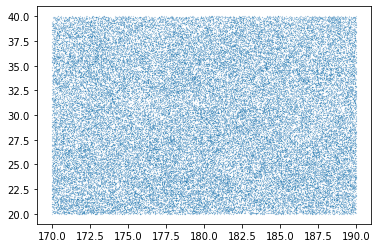

In [7]:
r = np.random.random(len(data))
rr = r<0.05
plt.scatter(data['RA'][rr], data['DEC'][rr],s=0.01)

In [8]:
tiles = Table.read("tiles/tiles_one_pct_dark.fits")
print(len(tiles))

157


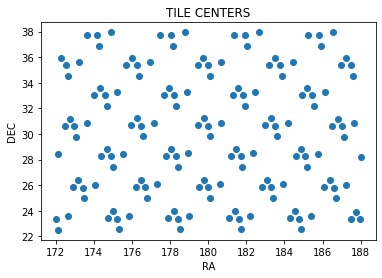

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(tiles['RA'], tiles['DEC'])
plt.title('TILE CENTERS')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('tiles.png')

In [51]:
summary = Table.read('fba_summary_all_dark.fits')

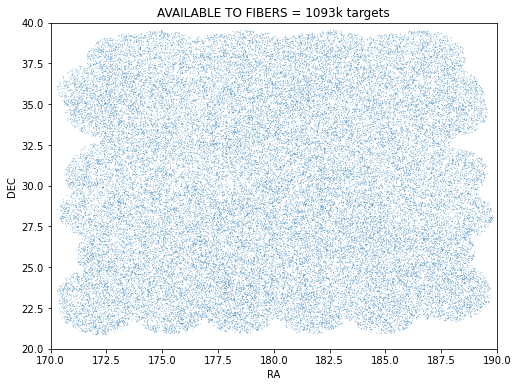

In [62]:
plt.figure(figsize=(8,6))

ii_available = summary['NAVAIL_FIBER']>0
r = np.random.random(len(summary))
rr = r<0.05
plt.scatter(summary['RA'][ii_available & rr], summary['DEC'][ii_available & rr],s=0.01)
plt.title('AVAILABLE TO FIBERS = {}k targets'.format(np.count_nonzero(ii_available)//1000))
plt.xlabel('RA')
plt.ylabel('DEC')
plt.xlim([170.0, 190.0])
plt.ylim([20.0, 40.0])
plt.savefig('available_to_fiber.png')

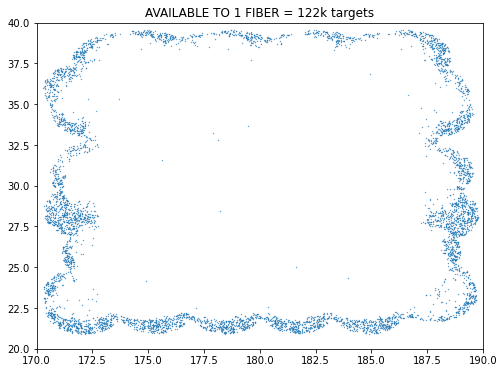

In [53]:
plt.figure(figsize=(8,6))
n_avail = 1
ii_available = summary['NAVAIL_TILE']==n_avail
r = np.random.random(len(summary))
rr = r<0.05
plt.scatter(summary['RA'][ii_available & rr], summary['DEC'][ii_available & rr],s=0.1)
plt.title('AVAILABLE TO {} FIBER = {:.0f}k targets'.format(n_avail, np.count_nonzero(ii_available)/1000))
plt.xlim([170.0, 190.0])
plt.ylim([20.0, 40.0])
plt.savefig('available_to_fiber_{}.png'.format(n_avail))

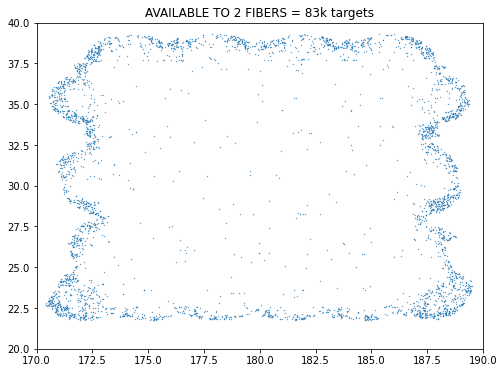

In [54]:
plt.figure(figsize=(8,6))
n_avail = 2
ii_available = summary['NAVAIL_TILE']==n_avail
r = np.random.random(len(summary))
rr = r<0.05
plt.scatter(summary['RA'][ii_available & rr], summary['DEC'][ii_available & rr],s=0.1)
plt.title('AVAILABLE TO {} FIBERS = {:.0f}k targets'.format(n_avail, np.count_nonzero(ii_available)/1000))
plt.xlim([170.0, 190.0])
plt.ylim([20.0, 40.0])
plt.savefig('available_to_fiber_{}.png'.format(n_avail))

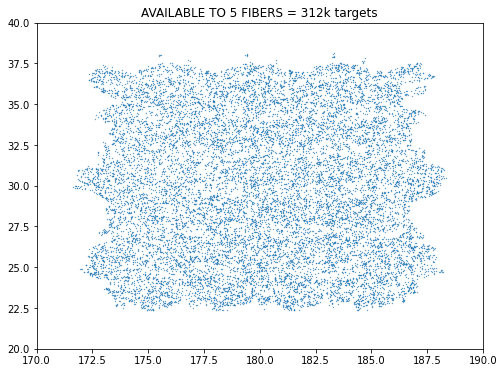

In [55]:
plt.figure(figsize=(8,6))
n_avail = 5
ii_available = summary['NAVAIL_TILE']==n_avail
r = np.random.random(len(summary))
rr = r<0.05
plt.scatter(summary['RA'][ii_available & rr], summary['DEC'][ii_available & rr],s=0.1)
plt.title('AVAILABLE TO {} FIBERS = {:.0f}k targets'.format(n_avail, np.count_nonzero(ii_available)/1000))
plt.xlim([170.0, 190.0])
plt.ylim([20.0, 40.0])
plt.savefig('available_to_fiber_{}.png'.format(n_avail))

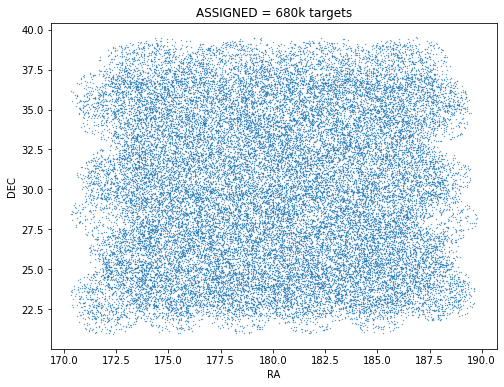

In [56]:
plt.figure(figsize=(8,6))

ii_assigned = summary['NUMOBS']>0
r = np.random.random(len(summary))
rr = r<0.05
plt.scatter(summary['RA'][ii_assigned & rr], summary['DEC'][ii_assigned & rr],s=0.1)
plt.title('ASSIGNED = {:d}k targets'.format(np.count_nonzero(ii_assigned)//1000))
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('assigned_targets.png')

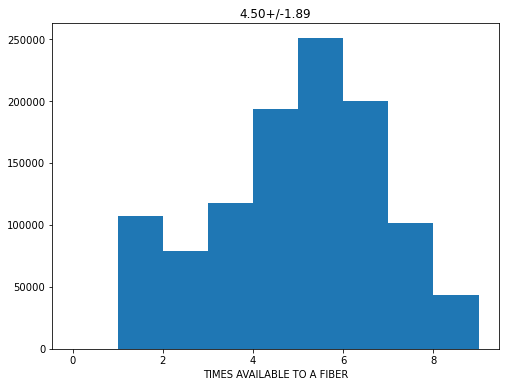

In [63]:
plt.figure(figsize=(8,6))
ii_available = summary['NAVAIL_TILE']>0
plt.hist(summary['NAVAIL_FIBER'][ii_available], bins=np.arange(10))
plt.title('{:.2f}+/-{:.2f}'.format(np.mean(summary['NAVAIL_FIBER'][ii_available]), np.std(summary['NAVAIL_FIBER'][ii_available])))
plt.xlabel('TIMES AVAILABLE TO A FIBER')
plt.savefig('histo_available.png')

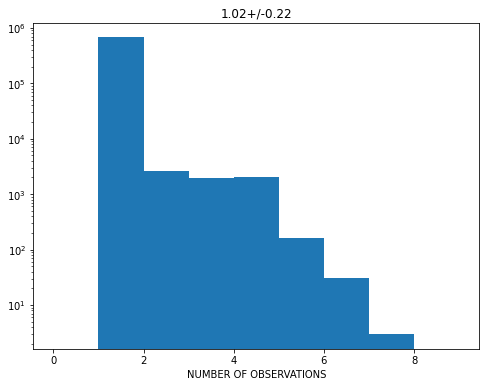

In [64]:
plt.figure(figsize=(8,6))
ii_assigned = summary['NUMOBS']>0
plt.hist(summary['NUMOBS'][ii_assigned], bins=np.arange(10), log=True)
plt.title('{:.2f}+/-{:.2f}'.format(np.mean(summary['NUMOBS'][ii_assigned]), np.std(summary['NUMOBS'][ii_assigned])))
plt.xlabel('NUMBER OF OBSERVATIONS')
plt.savefig('histo_numobs.png')

In [65]:
istargets = ['isELG', 'isLRG', 'isQSO']
print('{}\t{} \t{} \t{}'.format('type', 'N_A', 'N_F', 'eff'))
for istarget in istargets:
    ii_available = summary['NAVAIL_FIBER']>0
    ii_assigned = summary['NUMOBS']>0
    ii_target = summary[istarget]==True
    n_avail  = np.count_nonzero(ii_available & ii_target)
    n_assigned = np.count_nonzero(ii_assigned & ii_target & ii_available)
    eff = n_assigned/n_avail
    print('{}\t{}k\t{}k\t{:.2f}'.format(istarget, int(n_avail/1000), int(n_assigned/1000), eff))

type	N_A 	N_F 	eff
isELG	699k	430k	0.62
isLRG	164k	146k	0.89
isQSO	75k	73k	0.97


In [66]:
istargets = ['isELG', 'isLRG', 'isQSO']
print('{}\t{} \t{} \t{}'.format('type', 'N_A', 'N_F', 'eff'))
for istarget in istargets:
    ii_available = summary['NAVAIL_FIBER']>4
    ii_assigned = summary['NUMOBS']>0
    ii_target = summary[istarget]==True
    n_avail  = np.count_nonzero(ii_available & ii_target)
    n_assigned = np.count_nonzero(ii_assigned & ii_target & ii_available)
    eff = n_assigned/n_avail
    print('{}\t{}k\t{}k\t{:.2f}'.format(istarget, int(n_avail/1000), int(n_assigned/1000), eff))

type	N_A 	N_F 	eff
isELG	414k	324k	0.78
isLRG	60k	59k	0.99
isQSO	30k	30k	1.00


In [67]:
print('{}\t{} \t{} \t{}'.format('N_FIBER', 'N_A', 'N_F', 'eff'))
for i_avail in range(1,6):
    ii_available = summary['NAVAIL_FIBER']>=i_avail
    ii_assigned = summary['NUMOBS']>0
    n_assigned = np.count_nonzero(ii_assigned  & ii_available)
    n_avail  = np.count_nonzero(ii_available)
    eff = n_assigned/n_avail
    print('{}\t{}k\t{}k\t{:.2f}'.format(i_avail, int(n_avail/1000), int(n_assigned/1000), eff))

N_FIBER	N_A 	N_F 	eff
1	1093k	680k	0.62
2	987k	660k	0.67
3	908k	633k	0.70
4	790k	571k	0.72
5	596k	444k	0.74
